In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../csv_creation/final_data.csv", encoding="utf-8")

/Users/williamlee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.drop('Unnamed: 0', 1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,campaign_handle,ch,chamber,name,party,screen_name,source,state,text,time_created,type
0,NaN,yes,senate,Kamala Harris,D,KamalaHarris,Sprout Social,CA,No public hearings. \nNo debate. \nNo text.\nN...,2017-06-21T00:33:01-04:00,member
1,NaN,yes,house,Ted Lieu,D,tedlieu,Twitter for Android,CA,Why should world leaders trust or listen to US...,2017-06-21T00:02:47-04:00,member
2,NaN,yes,house,Jerrold Nadler,D,JerryNadler,Twitter for iPhone,NY,Congratulations to Jon @ossoff and #GADems on ...,2017-06-21T02:00:22-04:00,member
3,NaN,yes,house,Tulsi Gabbard,D,TulsiGabbard,Twitter for iPhone,HI,Join me in celebrating the gift of yoga on thi...,2017-06-21T01:39:55-04:00,member
4,NaN,yes,house,Jerrold Nadler,D,JerryNadler,Twitter for iPhone,NY,#GA06 is #GOP stronghold &amp; @ossoff nearly ...,2017-06-21T02:13:27-04:00,member


In [4]:
df.shape

(83147, 11)

# TWEET COUNT BY PARTY

In [5]:
df.party.value_counts()

D    48493
R    33751
I      304
Name: party, dtype: int64

In [6]:
df['time_created'] = pd.to_datetime(df['time_created'])

In [7]:
df.describe(include='all')

,campaign_handle,ch,chamber,name,party,screen_name,source,state,text,time_created,type
count,346,82215,82214,82559,82548,83146,83146,72094,83146,83145,82558
unique,2,3,3,572,3,880,47,52,82186,80540,5
top,no,no,house,Republicans,D,auctnr1,Twitter Web Client,CA,We have finished voting for the day.,2017-07-21 21:30:01,member
freq,345,67715,58718,1984,48493,1689,34419,7342,11,5,72093
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-21 04:02:47,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-05 03:52:00,NaN


# MEAN TWEET LENGTH

In [8]:
df2 = df.fillna('NaN')
tweets = [item for item in df2.text]
tweet_char_length = []
for tweet in tweets:
    if tweet == 'NaN':
        tweet_char_length.append(0)
    else:
        tweet_char_length.append(len(tweet))
count = 0
for x in tweet_char_length:
    count += x

mean_tweet_char_len = (count/len(tweets))

print(mean_tweet_char_len)

183.1831455133679


# TIME SERIES ANALYSIS

In [9]:
df1 = df.set_index('time_created')

In [10]:
df1.head()

,campaign_handle,ch,chamber,name,party,screen_name,source,state,text,type
time_created,,,,,,,,,,
2017-06-21 04:33:01,NaN,yes,senate,Kamala Harris,D,KamalaHarris,Sprout Social,CA,No public hearings. \nNo debate. \nNo text.\nN...,member
2017-06-21 04:02:47,NaN,yes,house,Ted Lieu,D,tedlieu,Twitter for Android,CA,Why should world leaders trust or listen to US...,member
2017-06-21 06:00:22,NaN,yes,house,Jerrold Nadler,D,JerryNadler,Twitter for iPhone,NY,Congratulations to Jon @ossoff and #GADems on ...,member
2017-06-21 05:39:55,NaN,yes,house,Tulsi Gabbard,D,TulsiGabbard,Twitter for iPhone,HI,Join me in celebrating the gift of yoga on thi...,member
2017-06-21 06:13:27,NaN,yes,house,Jerrold Nadler,D,JerryNadler,Twitter for iPhone,NY,#GA06 is #GOP stronghold &amp; @ossoff nearly ...,member


In [11]:
# View tweets from a particular day
df1['2017-06-21']

,campaign_handle,ch,chamber,name,party,screen_name,source,state,text,type
time_created,,,,,,,,,,
2017-06-21 04:33:01,NaN,yes,senate,Kamala Harris,D,KamalaHarris,Sprout Social,CA,No public hearings. \nNo debate. \nNo text.\nN...,member
2017-06-21 04:02:47,NaN,yes,house,Ted Lieu,D,tedlieu,Twitter for Android,CA,Why should world leaders trust or listen to US...,member
2017-06-21 06:00:22,NaN,yes,house,Jerrold Nadler,D,JerryNadler,Twitter for iPhone,NY,Congratulations to Jon @ossoff and #GADems on ...,member
2017-06-21 05:39:55,NaN,yes,house,Tulsi Gabbard,D,TulsiGabbard,Twitter for iPhone,HI,Join me in celebrating the gift of yoga on thi...,member
2017-06-21 06:13:27,NaN,yes,house,Jerrold Nadler,D,JerryNadler,Twitter for iPhone,NY,#GA06 is #GOP stronghold &amp; @ossoff nearly ...,member
2017-06-21 09:44:54,NaN,yes,senate,Marco Rubio,R,marcorubio,Twitter for iPad,FL,"One’s path may be winding and unfamiliar,\nbut...",member
2017-06-21 09:40:57,NaN,no,house,Keith Ellison,D,keithellison,Twitter for iPad,MN,“If you are verifying information for yourself...,member
2017-06-21 11:00:31,NaN,no,house,Jim Banks,R,RepJimBanks,Hootsuite,IN,"Going live on @WOWOFORTWAYNE in 8 minutes, tun...",member
2017-06-21 10:55:04,NaN,yes,house,Billy Long,R,auctnr1,Twitter for iPhone,MO,RT @FrankLuntz The crowd applauded when Bono s...,member


In [12]:
df['day_of_year'] = df.time_created.dt.date

In [13]:
# Create new dataframe of containing total congressional tweet count for each day in the data set
x = df.day_of_year.value_counts(sort=False)
vc = pd.DataFrame(x)

In [14]:
vc.head()

,day_of_year
2017-07-20,2810
2017-07-18,2958
2017-07-15,851
2017-07-21,1778
2017-07-05,1292


In [15]:
#Create new database features
vc['date'] = vc.index
vc['count'] = vc.day_of_year
vc.drop('day_of_year', 1, inplace=True)
vc.reset_index(inplace=True, drop=True)
vc.sort_values('date', inplace=True)
vc.reset_index(inplace=True, drop=True)
vc['date_time'] = pd.to_datetime(vc.date)
vc['day'] = vc.date_time.dt.weekday_name

In [16]:
vc.head()

,date,count,date_time,day
0,2017-06-21,2536,2017-06-21,Wednesday
1,2017-06-22,3171,2017-06-22,Thursday
2,2017-06-23,2063,2017-06-23,Friday
3,2017-06-24,843,2017-06-24,Saturday
4,2017-06-25,594,2017-06-25,Sunday


In [17]:
% matplotlib inline

# Plotting number of total tweets on each day

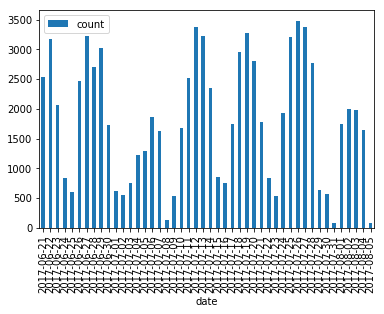

In [18]:
vc.plot(kind='bar', x='date', y='count')

# Plotting number of toal tweets by day of the week. Looks like even members of Congress enjoy their weekends

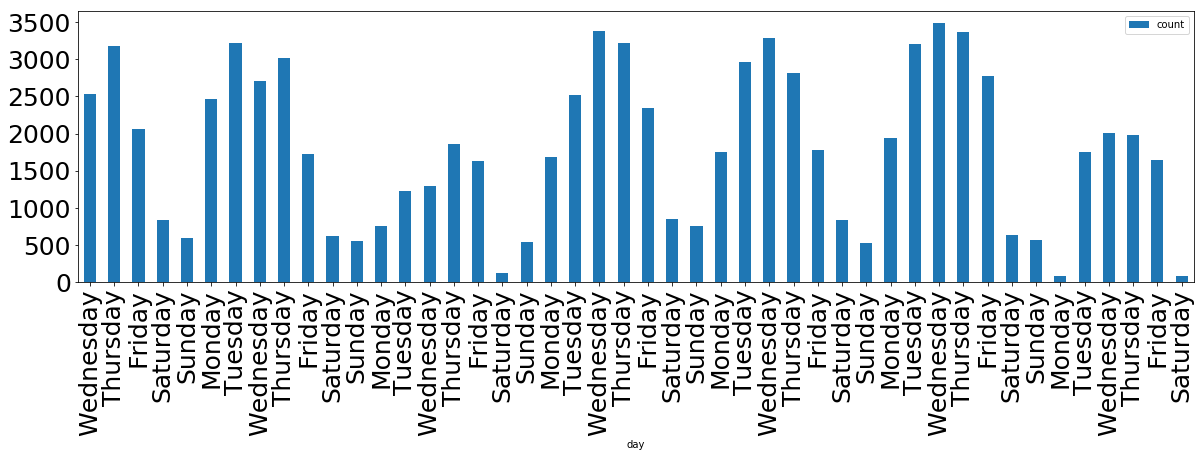

In [19]:
vc.plot(kind='bar', x='day', y='count', figsize=(20,5), fontsize=25)

# Percentage of tweets that include 'health' and 'russia'- interesting given the political situation at the time of these tweets

In [21]:
df.fillna({'text': 'NaN'}, inplace=True)
df['health'] = df.text.str.contains('Health', case=False).astype(int)

In [22]:
count = 0
for item in df.health:
    count += item
percentage_health = count/(len(df.health))
print(percentage_health)

0.128471261741


12.85% of tweets mention 'health'

In [23]:
df['russia'] = df.text.str.contains('russia', case=False).astype(int)
count = 0
for item in df.russia:
    count += item
percentage_russia = count/(len(df.russia))
print(percentage_russia)

0.0284435998894


2.84% of tweets mention 'russia'